In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

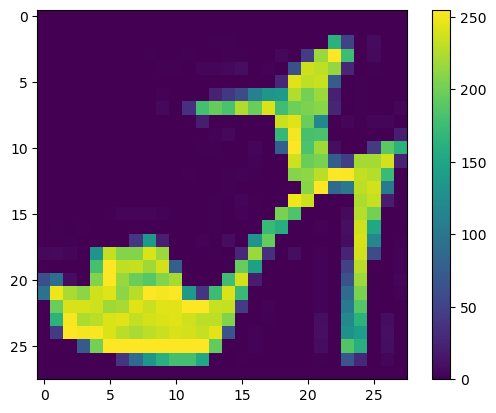

In [4]:
plt.figure()
plt.imshow(train_images[9])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

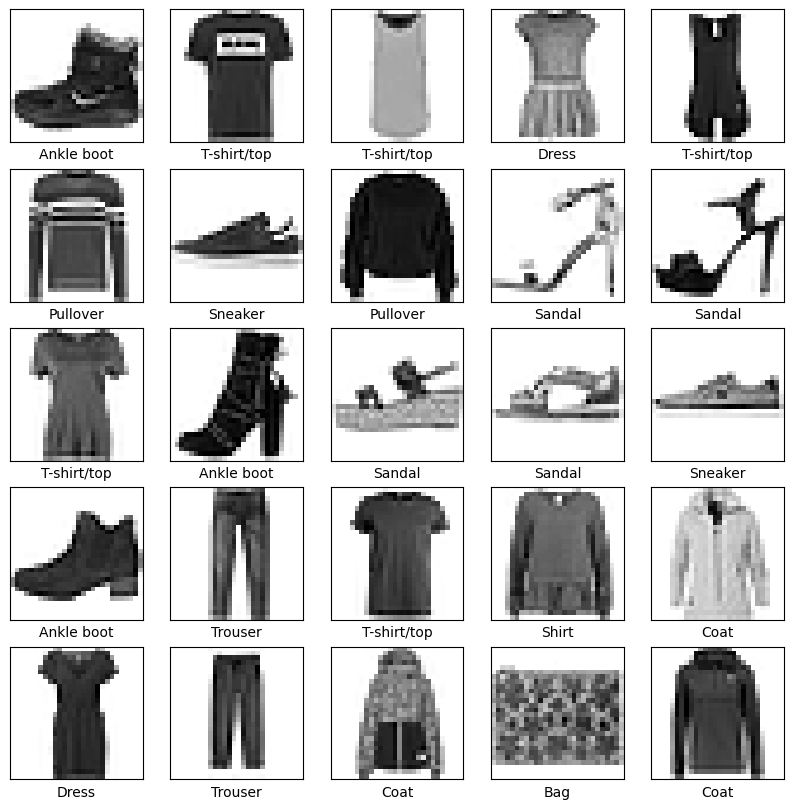

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Building model

In [11]:
inputs = tf.keras.Input(shape=(28, 28))
flatten_layer = tf.keras.layers.Flatten()(inputs)
dense_layer1 = tf.keras.layers.Dense(128, activation='relu')(flatten_layer)
outputs = tf.keras.layers.Dense(10)(dense_layer1)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

print(model.summary())

model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

probability_model = model.fit(train_images, train_labels, batch_size=32, epochs=4,verbose=1)

#Evaluating Accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/4
1875/1875 [==============================] - 1s 497us/step - loss: 0.4982 - accuracy: 0.8255
Epoch 2/4
1875/1875 [==============================] - 1s 497us/step - loss: 

In [17]:

# Define the Softmax layer
softmax_layer = tf.keras.layers.Softmax()

# Define the input tensor for the original model
input_tensor = model.input

# Get the output tensor of the original model
output_tensor = model.output

# Connect the Softmax layer to the output tensor of the original model
output_probabilities = softmax_layer(output_tensor)

# Define the new model with input_tensor as input and output_probabilities as output
probability_model = tf.keras.Model(inputs=input_tensor, outputs=output_probabilities)
predictions = probability_model.predict(test_images)


313/313 [==============================] - 0s 303us/step


In [18]:
test_labels[0]

9

In [19]:
def pl_image(i, pred_arr, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(pred_arr)
  if predicted_label == true_label:
    color = 'purple'
  else:
    color = 'pink'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(pred_arr),
                                class_names[true_label]),
                                color=color)

def pl_value(i, pred_arr, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), pred_arr, color="pink")
  plt.ylim([0, 1])
  predicted_label = np.argmax(pred_arr)

  thisplot[predicted_label].set_color('pink')
  thisplot[true_label].set_color('purple')

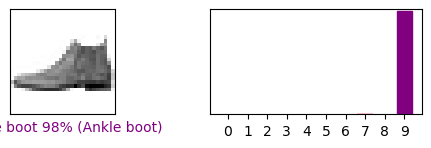

In [20]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(2,2,1)
pl_image(i, predictions[i], test_labels, test_images)
plt.subplot(2,2,2)
pl_value(i, predictions[i],  test_labels)
plt.show()

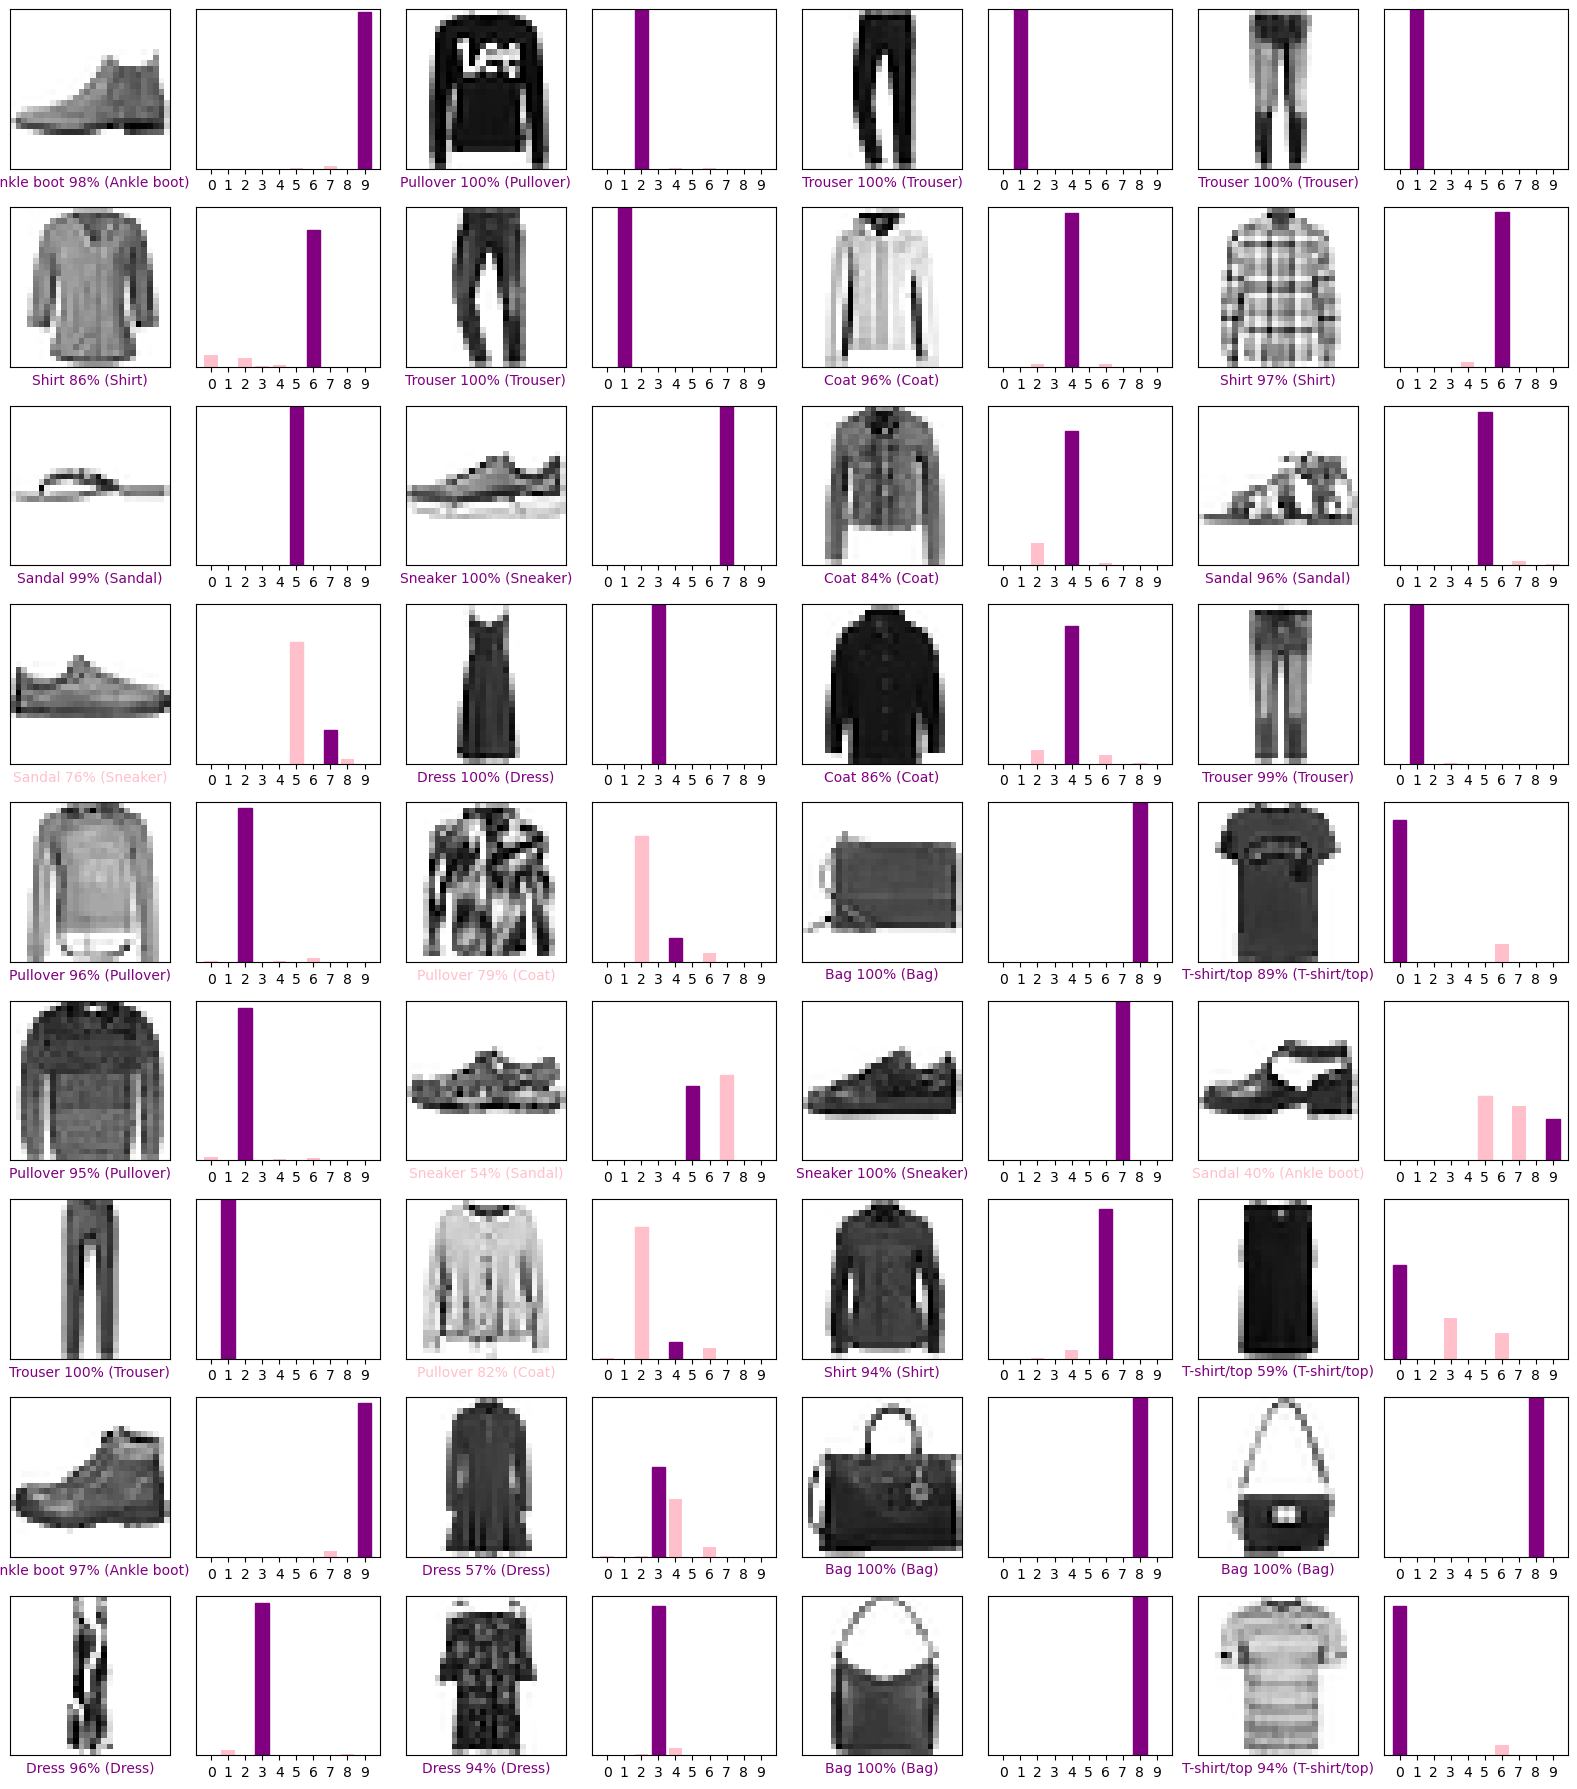

In [21]:
num_rows = 9
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  pl_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  pl_value(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()